# Introduction to NLP Fundamenrals in TensorFlow

## Check for GPU

In [ ]:
!nvidia-smi -L

GPU 0: Tesla T4 (UUID: GPU-335180a2-83d2-8014-167b-b0c4d85d1942)


## Get helper functions

In [ ]:
# Download helper functions script
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2023-07-17 09:09:03--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2023-07-17 09:09:03 (94.1 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [ ]:
# Import series of helper functions for the notebook
from helper_functions import unzip_data, create_tensorboard_callback, plot_loss_curves, compare_historys

## Get a text dataset

In [ ]:
# Download data (same as from Kaggle)
!wget "https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip"

# Unzip data
unzip_data("nlp_getting_started.zip")

--2023-07-17 09:09:07--  https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.134.128, 172.253.123.128, 74.125.141.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.134.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 607343 (593K) [application/zip]
Saving to: ‘nlp_getting_started.zip’

nlp_getting_started 100%[===================>] 593.11K  --.-KB/s    in 0.004s  

2023-07-17 09:09:07 (131 MB/s) - ‘nlp_getting_started.zip’ saved [607343/607343]



## Visualizing a text dataset

In [ ]:
# turn .-csv files into pandas DataFrame's
import pandas as pd
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")
train_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [ ]:
# Shuffle training dataframe  train datasını karıştırma
train_df_shuffled = train_df.sample(frac=1,random_state=42)# frac=1 diyerek tüm veri setini karıştırıyoruz
train_df_shuffled.head()

,id,keyword,location,text,target
2644,3796,destruction,NaN,So you have a new weapon that can cause un-ima...,1
2227,3185,deluge,NaN,The f$&amp;@ing things I do for #GISHWHES Just...,0
5448,7769,police,UK,DT @georgegalloway: RT @Galloway4Mayor: ÛÏThe...,1
132,191,aftershock,NaN,Aftershock back to school kick off was great. ...,0
6845,9810,trauma,"Montgomery County, MD",in response to trauma Children of Addicts deve...,0


In [ ]:
# What does the test dataframe lool like
test_df.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [ ]:
# How many example of each class
train_df.target.value_counts()

0    4342
1    3271
Name: target, dtype: int64

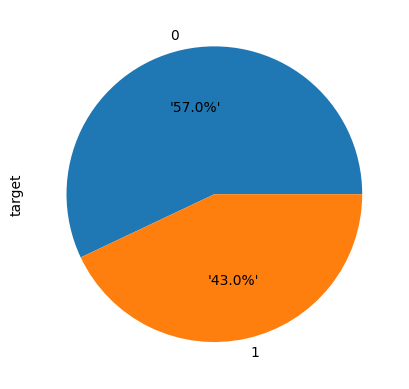

In [ ]:
# plot
train_df.target.value_counts().plot(kind="pie",autopct="'%1.1f%%'");

In [ ]:
# How many samples total?
print(f"Total training samples: {len(train_df)}")
print(f"Total test samples: {len(test_df)}")
print(f"Total samples: {len(train_df) + len(test_df)}")

Total training samples: 7613
Total test samples: 3263
Total samples: 10876


In [ ]:
# Let's visualize some random training examples
import random
random_index = random.randint(0,len(train_df)-5)# -5 ifadesi, son 5 satırın dışında bir indeks seçmek istediğinizi belirtir.
for row in train_df_shuffled[["text","target"]][random_index:random_index+5].itertuples():
  _, text, target = row
  print(f"Target: {target}", "(real disaster)" if target > 0 else "(not real disaster)")
  print(f"Text:\n{text}\n")
  print("---\n")



Target: 0 (not real disaster)
Text:
@aptly_engineerd There is no such curfew.

---

Target: 1 (real disaster)
Text:
Three Israeli soldiers wounded in West Bank terrorist attack via /r/worldnews http://t.co/9TyucdWh3g

---

Target: 0 (not real disaster)
Text:
Reddit's new content policy goes into effect many horrible subreddits banned or quarantined http://t.co/4oNvxncz8w http://t.co/tnggXNm6k8

---

Target: 0 (not real disaster)
Text:
Black Eye 9: A space battle occurred at Star O784 involving 3 fleets totaling 3941 ships with 13 destroyed

---

Target: 0 (not real disaster)
Text:
@5SOSFamUpdater social casualty

---



## Split data into training and validation sets

In [ ]:
from sklearn.model_selection import train_test_split

# Use train_test_split to split training data into training and validation sets
train_sentences, val_sentences, train_labels, val_labels = train_test_split(train_df_shuffled["text"].to_numpy(),
                                                                            train_df_shuffled["target"].to_numpy(),
                                                                            test_size=0.1, # dedicate 10% of samples to validation set
                                                                            random_state=42) # random state for reproducibility

In [ ]:
# Check the lengths
len(train_sentences),len(train_labels),len(val_sentences),len(val_labels)

(6851, 6851, 762, 762)

In [ ]:
# View the first 10 training sentences and teheir labels
train_sentences[:10],train_labels[:10]

(array(['@mogacola @zamtriossu i screamed after hitting tweet',
        'Imagine getting flattened by Kurt Zouma',
        '@Gurmeetramrahim #MSGDoing111WelfareWorks Green S welfare force ke appx 65000 members har time disaster victim ki help ke liye tyar hai....',
        "@shakjn @C7 @Magnums im shaking in fear he's gonna hack the planet",
        'Somehow find you and I collide http://t.co/Ee8RpOahPk',
        '@EvaHanderek @MarleyKnysh great times until the bus driver held us hostage in the mall parking lot lmfao',
        'destroy the free fandom honestly',
        'Weapons stolen from National Guard Armory in New Albany still missing #Gunsense http://t.co/lKNU8902JE',
        '@wfaaweather Pete when will the heat wave pass? Is it really going to be mid month? Frisco Boy Scouts have a canoe trip in Okla.',
        'Patient-reported outcomes in long-term survivors of metastatic colorectal cancer - British Journal of Surgery http://t.co/5Yl4DC1Tqt'],
       dtype=object),
 array([0,

## Converting text into numbers

Modeli insa etmeden önce yapmamiz gerken şeylerden biri metni sayilara dönüştürmektir bunu yapmaminin birkaç yolu vardir

* Tokenzition

* Embedding ise her belirteç için özelik vektörlerinden oluşan bir matrix oluşturur özelik vektörünün boyutu tanimlanabilir

ilk başka Tokenzition metni parçalara ayirirken embeddings ise bu parçalari sayisal vektör temsilleri ile ifade eder

## Text vectorization (tokenization)

Belirteçleştirme ve yerleştirmeler hakkında yeterince konuştuk, hadi biraz oluşturalım. Önce tokenzation (kelimelerimizi sayılara eşleme) alıştırması yapacağız. Sözlerimizi tokenize etmek için yardımcı ön işleme katmanı tf.keras.layers.experimental.preprocessing.TextVectorization kullanacağız. TextVectorization katmanı aşağıdaki parametreleri alır: max_tokens - Kelime dağarcığınızdaki maksimum kelime sayısı (örn. 20000 veya metninizdeki benzersiz kelimelerin sayısı), OOV (sözcük dağarcığı dışı) belirteçleri için bir değer içerir. standardize - Metni standartlaştırma yöntemi. Varsayılan, metni azaltan ve tüm noktalama işaretlerini kaldıran "lower_and_strip_punctuation" şeklindedir. split - Metin nasıl bölünür, varsayılan boşluklara bölünen "boşluktur". ngrams - Belirteç bölünmesi başına kaç kelime içerecek, örneğin, ngrams=2, belirteçleri 2'lik sürekli dizilere böler. output_mode - Belirteçlerin çıktısı nasıl alınır, "int" (tamsayı eşleme), "ikili" (tek sıcak kodlama) olabilir ), "count" veya "tf-idf". Daha fazlası için belgelere bakın. output_sequence_length - Çıkış için belirteçleştirilmiş dizinin uzunluğu. Örneğin, output_sequence_length=150 ise, tüm belirteçleştirilmiş diziler 150 belirteç uzunluğunda olacaktır. pad_to_max_tokens - Varsayılan olarak False olur, True ise, kelime dağarcığındaki benzersiz belirteçlerin sayısı max_tokens'tan az olsa bile çıktı özelliği ekseni max_tokens'a doldurulur. Yalnızca belirli modlarda geçerlidir, daha fazlası için belgelere bakın.

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import TextVectorization # after TensorFlow 2.6
# Before TensorFlow 2.6
# from tensorflow.keras.layers.experimental.preprocessing import TextVectorization
# Note: in TensorFlow 2.6+, you no longer need "layers.experimental.preprocessing"
# you can use: "tf.keras.layers.TextVectorization", see https://github.com/tensorflow/tensorflow/releases/tag/v2.6.0 for more

# Use the default TextVectorization variables Default parametreleri kulanarak TextVectorization oluşturacağız
text_vectorizer = TextVectorization(max_tokens=None,# None olarak ayarlandığı zaman kelime darağıcındaki tüm kelimeleri içerirr
                                    standardize="lower_and_strip_punctuation", # Metnin nasil işliyeceğinin belirtir Bu ayar metni küçük harflere dönüştütüt ve noktalama işaretlerini kaldırır
                                    split="whitespace",# Metindeki kelimelerin nasil ayarlanacağını belirtir bu ayar  metindeki boşlukları kullanrak kelimeleri ayirir
                                    ngrams=None,# Kelimeler gruplari oluşturulacakmı yoksa tek tek mi olarak işleneceğinin belirtir None olarak ayarlandığında her kelime tek başına işlenir
                                    output_mode="int", # kelimelerin sayilara nasıl eşleneceğini belirtir Bu ayar her kelimenin bir tam sayiya dönüştürülmesini sağlar
                                    output_sequence_length=None) # Çıktidaki kelime dizisinin uzunluğunu belirtir None olarak ayarlandığında çıktıdaki kelime uzunluğu girişe bağlı olacaktir her kelime gurubunu en uzun olana
                                    # eşleyecek
                                    #pad_to_max_tokens=True#   u ayar, max_tokens değeri belirlenmişse, çıktı dizisinin maksimum kelime sayısına kadar doldurulup doldurulmayacağını belirtir. Ancak,
                                    #max_tokens=None olarak ayarlandığında bu geçerli değildir ve kullanılmaz.


In [ ]:
train_sentences[0].split()

['@mogacola', '@zamtriossu', 'i', 'screamed', 'after', 'hitting', 'tweet']

In [ ]:
# Find average number of tokens (words) in training Tweets
round(sum([len(i.split()) for i in train_sentences])/len(train_sentences)) # Maksimmum uzuluk eğitim tweet imizdeki belirteçlerin ortalama uzunluğunu ayarlayacağız

15

In [ ]:
# Setup text vectorization variables
max_vocab_length = 10000 # Max number of words to have in our vocabulary
max_lenght = 15 # # dizilerimizin maksimum uzunluğu (ör. modelimiz bir Tweet'ten kaç kelime görüyor?)
text_vectorizer = TextVectorization(max_tokens = max_vocab_length,
                                    output_mode ="int",
                                    output_sequence_length=max_lenght)# sınırlama yaptık diye düşünebiliriz

In [ ]:
# Fit the text vectorizer to the training text Metin vektörleştiriciyi eğitim metnine sığdır
text_vectorizer.adapt(train_sentences)

In [ ]:
# Create sample sentence and tokenize it
sample_sentence ="Thre's a flood in my street!"
text_vectorizer([sample_sentence])# Tewtleri ortalama 15 uzunluğa sabitlediğimiz için 8 uzunluktaki bir tiwitim 7 uzunluğu boş kalmaması için 0 ile doldurulacak

<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[  1,   3, 232,   4,  13, 698,   0,   0,   0,   0,   0,   0,   0,
          0,   0]])>

In [ ]:
# Choose a random sentence from the training dataset and tokenize it
random_sentence=random.choice(train_sentences)
print(f"Original text:\n{random_sentence}\
      \n\nVectorized version")
text_vectorizer([random_sentence])

Original text:
It is not always friendship when kisses show up neither is it always enemity that shows up when wounds show up. #BishopFred      

Vectorized version


<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[  15,    9,   34,  262, 5598,   45, 5272,  431,   27, 3597,    9,
          15,  262,    1,   16]])>

In [ ]:
# Get the unique words in the vocabulary
words_in_vocab = text_vectorizer.get_vocabulary()# Eğitim verilerimizdeki kelime darağıcındaki kelime sayisi
top_5_words = words_in_vocab[:5] # most common tokens (notice the [UNK] token for "unknown" words) en yaygın kelimeler
bottom_5_words = words_in_vocab[-5:] # least common tokens en az yaygın kelimeler
print(f"Number of words in vocab: {len(words_in_vocab)}")
print(f"Top 5 most common words: {top_5_words}")
print(f"Bottom 5 least common words: {bottom_5_words}")

Number of words in vocab: 10000
Top 5 most common words: ['', '[UNK]', 'the', 'a', 'in']
Bottom 5 least common words: ['pages', 'paeds', 'pads', 'padres', 'paddytomlinson1']


## Creating an Embedding using an Embedding Layer

Metnimizi sayılara eşlemenin bir yolunu bulduk. Bir adım daha ileri gidip bu sayıları bir gömme haline getirmeye ne dersiniz? Gömme ile ilgili güçlü olan şey, eğitim sırasında öğrenilebilmesidir. Bu, yalnızca statik olmak yerine (örneğin, 1 = I, 2 = aşk, 3 = TensorFlow), bir model veri örneklerinden geçerken bir kelimenin sayısal temsilinin geliştirilebileceği anlamına gelir. tf.keras.layers.Embedding katmanını kullanarak bir kelimenin gömülmesinin nasıl göründüğünü görebiliriz. Burada ilgilendiğimiz ana parametreler şunlardır: input_dim - Kelime dağarcığının boyutu (örn. len(text_vectorizer.get_vocabulary()) output_dim - Çıktı yerleştirme vektörünün boyutu, örneğin, 100 değeri bir özellik vektörü verir embeddings_initializer - Gömme matrisi nasıl başlatılır, varsayılan değer "tekdüze"dir ve gömme matrisini tekdüze dağılımla rastgele başlatır. Bu, önceden öğrenilmiş katıştırmaları kullanmak için değiştirilebilir. input_length - Gömmeye geçirilen dizilerin uzunluğu Bunları bilerek bir gömme katmanı oluşturalım.

In [ ]:
tf.random.set_seed(42)
from tensorflow.keras import layers
# Embedding katmanı bir metin kümesindeki kelimeleri temsil etmek için kullanılan embedding katmanıdır
#Bu katman, her bir kelimeyi önceden belirlenen bir boyutta bir vektörle temsil eder. Her kelime bir indeksle gösterilir ve bu indeks,
#gömme matrisindeki sütunları seçmek için kullanılır. Gömme matrisindeki sütunlar, kelime temsil vektörlerini içerir.
embedding = layers.Embedding(input_dim=max_vocab_length,# Bu kelime darağıcının vecab boyutudur yani veri kümesinkdei farkli kelime sayisisdir her bir kelimeye benzersiz index atılır
                             output_dim=128,# Bu gömme vektörününün boyutudur Her kelime bu boyutta bir vektör ile temsil edilir
                             embeddings_initializer="uniform",# Bu, gömme matrisinin başlangıç değerlerini nasıl ayarlayacağını belirler. "uniform" kullanıldığında, başlangıç değerleri rastgele olarak atanır.
                             input_length=max_lenght,# Bu her bir giriş örneğinin ne kadar uzun olduğunu belirtir
                             name="embedding_1")
# Embedding katmanı rasgele başlar ve öğrendikçe sayısal formatını düzenler yani öğrenme gerçekleştikçe kendini yeniler

Mükemmel, TensoFlow katmanının nasıl gömüldüğünü fark ettiniz mi? Bu önemlidir çünkü onu bir modelin parçası olarak kullanabiliriz, yani model öğrendikçe parametreleri (kelime temsilleri) güncellenebilir ve geliştirilebilir. Örnek bir cümle üzerinde denemeye ne dersiniz?

In [ ]:
# Get a random sentence from training set
random_sentence = random.choice(train_sentences)
print(f"Original text:\n{random_sentence}\
      \n\nEmbedded version:")

# Embed the random sentence (turn it into numerical representation)
sample_embed = embedding(text_vectorizer([random_sentence]))
sample_embed

Original text:
Obsolete devastation from Broad with the Ball. And Root doing it with Bat in hand. Great Day #ashes2015 #ENGvAUS http://t.co/a7TJAWWtJ7      

Embedded version:


<tf.Tensor: shape=(1, 15, 128), dtype=float32, numpy=
array([[[ 2.76857279e-02,  2.92347185e-02, -1.34084374e-03, ...,
         -5.71895763e-03,  9.33993608e-04, -3.04192901e-02],
        [ 4.86075319e-02, -3.54029164e-02,  3.31236981e-02, ...,
         -9.35391337e-03,  2.91081704e-02,  1.78921558e-02],
        [ 1.48284920e-02, -1.93894990e-02, -1.08480453e-05, ...,
         -3.71058099e-02,  4.37202714e-02,  1.18391588e-03],
        ...,
        [ 4.91571762e-02, -4.38871756e-02, -1.37876645e-02, ...,
         -1.43724196e-02,  4.73069288e-02, -2.19535828e-03],
        [ 2.68805511e-02, -2.39020940e-02,  2.38473900e-02, ...,
         -4.60117124e-02, -3.67106125e-03, -4.75754738e-02],
        [ 3.11133601e-02, -3.59012000e-02, -3.36464271e-02, ...,
         -1.04313865e-02, -2.57823952e-02, -3.63949537e-02]]],
      dtype=float32)>

In [ ]:
# Check out a single token's embedding
sample_embed[0][0]

<tf.Tensor: shape=(128,), dtype=float32, numpy=
array([ 0.02768573,  0.02923472, -0.00134084,  0.01363723,  0.03770907,
       -0.04454416, -0.03683899,  0.00895306, -0.01123469, -0.00405483,
       -0.0370814 , -0.00173191, -0.01496451, -0.00334962, -0.00570078,
       -0.00830054,  0.01103268, -0.00415884,  0.0122683 , -0.00380618,
       -0.04849849, -0.04316752, -0.00629635, -0.00647875, -0.04295901,
       -0.02458475,  0.04806613, -0.02110546, -0.04954646, -0.04738008,
        0.01725433,  0.039799  , -0.00380174,  0.04550036, -0.03985416,
       -0.04090809,  0.02204329, -0.01279277,  0.01295939, -0.00838872,
        0.02672365, -0.02182609, -0.01534277, -0.00376873,  0.00761583,
       -0.02691691,  0.0251338 ,  0.00617161,  0.04349667, -0.0065136 ,
       -0.0328539 ,  0.03812074,  0.04130024, -0.02354504, -0.01157997,
       -0.03243162,  0.04079172,  0.0298584 ,  0.03316063,  0.02431831,
       -0.01153539,  0.00862719, -0.01587521,  0.00776467, -0.00694459,
       -0.036724

## Modelling a text dataset

* Model 0: Naive Bayes (baseline)

* Model 1: Feed-forward neural network (dense model)

* Model 2: LSTM model(RNN)

* Model 3: GRU model(RNN)

* Model 4: Bidirectional-LSTM model(RNN)

* Model 5: 1D Convolutional Neural Network(CNN)

* Model 6: TensorFlow Hub Pretrained Feature Extractor(using transfer learning NLP)

* Model 7: Same as model 6 with 10% of training data

Use the standart steps in modelling with tensorflow

* Craete a model

* Build a model

* Fit a model

* Evaluate our model

## Model 0: Getting a baseline

Tüm makine öğrenimi modelleme deneylerinde olduğu gibi, temel bir model oluşturmak önemlidir, böylece gelecekteki deneyler için üzerine inşa edebileceğiniz bir karşılaştırma ölçütünüz olur. Temelimizi oluşturmak için, kelimelerimizi sayılara dönüştürmek için TF-IDF (terim frekansı-ters belge frekansı) formülünü kullanarak bir Scikit-Learn Pipeline oluşturacağız ve ardından bunları Multinomial Naive Bayes algoritmasıyla modelleyeceğiz. Bu, Scikit-Learn makine öğrenimi haritasına atıfta bulunularak seçildi. 📖 Okuma: TF-IDF algoritmasının tüm ayrıntıları bu defterin kapsamı dışındadır, ancak meraklı okuyucunun daha fazlası için Scikit-Learn belgelerine göz atması önerilir.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline # genelikle veri ön işlemi adımlarını örenkleme ölçekleme dönüştürme vb ardından makine öğrenim modelinin tanımlamasınına olanak sağlar
# Böylece, veri işleme adımları ve tahminleme modeli bir araya getirilerek birlikte kullanılabilir.
model_0 = Pipeline([ # Bu kod metin verilerini özeliklere dönüştürmek için  Naive Bayes sınıflandırma modelini kulanarak bu verileri sınıflandırmak için Pipeline oluşturur
    ("tfidf", TfidfVectorizer()), # TfidfVectorizer sınıfı metin verilerini sayısal özeliklere dönüştürmek için kullanılır metin verilerini alır ve her bir kelimeyi sayısal vektöre dönüştürür
    ("clf", MultinomialNB()) # MultinomialNB sınıfı, Naive Bayes sınıflandırma modelini temsil eder. Bu model, olasılıklı bir sınıflandırma algoritmasıdır ve metin sınıflandırmada sıkça kullanılır
])
# Son olarak, Pipeline sınıfı, veri ön işleme adımlarını ve sınıflandırma modelini birleştirir. Pipeline içindeki her bir adım, bir isim ve bir işlemi temsil eder. tfidf adımı,
# metin verilerini özellik vektörlerine dönüştürürken clf adımı, sınıflandırma modelini temsil eder.
# Fit the pipeline to the training data
model_0.fit(train_sentences, train_labels)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())])

In [ ]:
# Evalaute our baseline model
baseline_score = model_0.score(val_sentences, val_labels)
print(f"Our baseline model achieves an accuracy of: {baseline_score*100:.2f}%")

Our baseline model achieves an accuracy of: 79.27%


In [ ]:
# Make a predictions
baseline_preds = model_0.predict(val_sentences)
baseline_preds[:20]

array([1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1])

## Creating an evaluation function for our model experiments

* Accuracy

* Precision

* Recall

* F1-score

🔑 Not: Bir sınıflandırma problemi ile uğraştığımız için yukarıdaki metrikler en uygun olanlardır. Bir regresyon problemi ile çalışıyor olsaydık, MAE (ortalama mutlak hata) gibi diğer ölçümler daha iyi bir seçim olurdu.

In [ ]:
# Function to evaluate: accuracy, precision, recall, f1-score
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
def calculate_results(y_true,y_pred):
  # Calculate model accuracy
  model_accuracy = accuracy_score(y_true,y_pred)*100
  # Calculate model precision, recall and f1 score using "weighted" average
  model_precision, model_recall, model_f1,_ = precision_recall_fscore_support(y_true,y_pred,average="weighted")
  model_results = {"accuracy": model_accuracy,
                  "precision": model_precision,
                  "recall": model_recall,
                  "f1": model_f1}
  return model_results


In [ ]:
# Get baseline results
baseline_results = calculate_results(y_true=val_labels,
                                     y_pred=baseline_preds)
baseline_results

{'accuracy': 79.26509186351706,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706,
 'f1': 0.7862189758049549}

## Model 1: A simple dense model

In [ ]:
# Create tensorboard callback (need to create a new one for each model)
from helper_functions import create_tensorboard_callback

# Create directory to save TensorBoard logs
SAVE_DIR = "model_logs"

In [ ]:
from keras.api._v2.keras import activations
# Build model with the Functional API
from tensorflow.keras import layers
inputs = layers.Input(shape=(1,),dtype="string") # # girişler 1 boyutlu dizilerdir
x = text_vectorizer(inputs)# Girdilerimizi sayısal formata çevirmek için text_vectorizer katmanına veriyoruz
x = embedding(x) # numaralandırılımış girdilerin oluşturulması ve gömülmesi
x = layers.GlobalAveragePooling1D()(x) # # gömmenin boyutsallığını azaltın (modeli bu katman olmadan çalıştırmayı deneyin ve ne olduğunu görün
# x= layers.GlobalMaxPool1D()(x)
outputs = layers.Dense(1,activation="sigmoid")(x) # Create the outputs Layer
model_1 = tf.keras.Model(inputs,outputs,name="model_1_dens") #  construct the model

In [ ]:
model_1.summary()

Model: "model_1_dens"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding_1 (Embedding)     (None, 15, 128)           1280000   
                                                                 
 global_average_pooling1d (G  (None, 128)              0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 1,280,129
Trainable params: 1,280,129
No

İyi görünüyor. Modelimiz girdi olarak 1 boyutlu bir dize alır (bizim durumumuzda bir Tweet), ardından text_vectorizer kullanarak dizeyi simgeleştirir ve gömme kullanarak bir katıştırma oluşturur. Daha sonra (isteğe bağlı olarak) çıkış katmanına geçirdiğimiz tensörün boyutsallığını azaltmak için gömme katmanının çıktılarını havuzlarız. 🛠 Alıştırma: Gömme katmanından sonra GlobalAveragePooling1D() katmanı olan ve olmayan model_1'i oluşturmayı deneyin. Ne oluyor? Bunun neden olduğunu düşünüyorsun? Son olarak pooling katmanının çıktısını sigmoid aktivasyonu ile yoğun bir katmana aktarıyoruz (sigmoid kullanıyoruz çünkü problemimiz ikili sınıflandırma). Modelimizi verilere uydurmadan önce derlememiz gerekiyor. İkili sınıflandırma ile çalıştığımız için, kayıp fonksiyonumuz ve Adam iyileştirici olarak "binary_crossentropy" kullanacağız.

In [ ]:
# Compile model
model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [ ]:
# Get a summary of the model
model_1.summary()

Model: "model_1_dens"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding_1 (Embedding)     (None, 15, 128)           1280000   
                                                                 
 global_average_pooling1d (G  (None, 128)              0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 1,280,129
Trainable params: 1,280,129
No

Eğitilebilir parametrelerin çoğu gömme katmanında bulunur. 10.000 (input_dim=10000) boyutunda bir kelime dağarcığı için 128 boyutunda (output_dim=128) bir yerleştirme oluşturduğumuzu hatırlayın, dolayısıyla 1.280.000 eğitilebilir parametre. Pekala, modelimiz derlendi, 5 epoch için eğitim verilerimize sığdıralım. Modelimizin eğitim ölçümlerinin günlüğe kaydedildiğinden emin olmak için TensorBoard geri arama işlevimizi de geçeceğiz.


In [ ]:
# Fit the model
model_1_history = model_1.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences,val_labels),
                              callbacks=[create_tensorboard_callback(dir_name=SAVE_DIR,
                                                                     experiment_name="simple_dense_model")])

Saving TensorBoard log files to: model_logs/simple_dense_model/20230717-090927
Epoch 1/5
215/215 [==============================] - 23s 79ms/step - loss: 0.6082 - accuracy: 0.6936 - val_loss: 0.5349 - val_accuracy: 0.7520
Epoch 2/5
215/215 [==============================] - 3s 13ms/step - loss: 0.4401 - accuracy: 0.8192 - val_loss: 0.4688 - val_accuracy: 0.7861
Epoch 3/5
215/215 [==============================] - 2s 12ms/step - loss: 0.3455 - accuracy: 0.8612 - val_loss: 0.4588 - val_accuracy: 0.7887
Epoch 4/5
215/215 [==============================] - 2s 9ms/step - loss: 0.2841 - accuracy: 0.8924 - val_loss: 0.4640 - val_accuracy: 0.7913
Epoch 5/5
215/215 [==============================] - 3s 15ms/step - loss: 0.2373 - accuracy: 0.9121 - val_loss: 0.4766 - val_accuracy: 0.7874


In [ ]:
# Check the results
model_1.evaluate(val_sentences, val_labels)

24/24 [==============================] - 0s 3ms/step - loss: 0.4766 - accuracy: 0.7874


[0.47659793496131897, 0.787401556968689]

In [ ]:
# Make some predictions and evaluate those
model_1_pred_probs = model_1.predict(val_sentences)
model_1_pred_probs.shape

24/24 [==============================] - 0s 2ms/step


(762, 1)

In [ ]:
# Look at a single predictions
model_1_pred_probs[0]

array([0.41713768], dtype=float32)

In [ ]:
# Look at the first 10 predictions
model_1_pred_probs[:10]

array([[0.41713768],
       [0.7447805 ],
       [0.99792874],
       [0.11224864],
       [0.10805994],
       [0.9376835 ],
       [0.9138168 ],
       [0.9929571 ],
       [0.9718555 ],
       [0.26683295]], dtype=float32)

In [ ]:
# Conver model predictions probabilities to label format
model_1_preds = tf.squeeze(tf.round(model_1_pred_probs))
model_1_preds[:20]

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 1.], dtype=float32)>

In [ ]:
# Calculate our model_1 results
model_1_results = calculate_results(y_true=val_labels,
                                    y_pred=model_1_preds)
model_1_results

{'accuracy': 78.74015748031496,
 'precision': 0.7914920592553047,
 'recall': 0.7874015748031497,
 'f1': 0.7846966492209201}

In [ ]:
baseline_results

{'accuracy': 79.26509186351706,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706,
 'f1': 0.7862189758049549}

In [ ]:
import numpy as np
np.array(list(model_1_results.values())) > np.array(list(baseline_results.values()))

array([False, False, False, False])

## Visualizing learned embeddings

In [ ]:
# Get the vocabulary from the text vectorization layer
words_in_vocab = text_vectorizer.get_vocabulary()# Bu kod, metin vektörleştirme katmanından (text_vectorization layer)
#elde edilen kelime dağarcığını (vocabulary) alır ve kelime dağarcığındaki kelime sayısını ve ilk 10 kelimeyi yazdırır.
len(words_in_vocab),words_in_vocab[:10]

(10000, ['', '[UNK]', 'the', 'a', 'in', 'to', 'of', 'and', 'i', 'is'])

In [ ]:
# Model 1 summary
model_1.summary()

Model: "model_1_dens"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding_1 (Embedding)     (None, 15, 128)           1280000   
                                                                 
 global_average_pooling1d (G  (None, 128)              0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 1,280,129
Trainable params: 1,280,129
No

In [ ]:
# Get the weight matrix of embedding layer
# these are numerical representations of each token in training data
embed_weights = model_1.get_layer("embedding_1").get_weights()[0]
print(embed_weights.shape) # Bu kod, bir modeldeki "embedding_1" isimli katmandan elde edilen gömme ağırlıklarını (embedding weights) döndürür ve bunların boyutunu (shape) yazdırır.

(10000, 128)


In [ ]:
embed_weights

array([[ 0.04517626,  0.02758587, -0.00021829, ..., -0.01642603,
         0.01821811,  0.00338633],
       [ 0.02863948,  0.03246033, -0.0042946 , ..., -0.00305313,
         0.00097258, -0.03268242],
       [ 0.00772104,  0.0564872 ,  0.0333816 , ..., -0.03274751,
        -0.0198342 ,  0.01942342],
       ...,
       [ 0.01178936, -0.02626498, -0.00281208, ..., -0.01935953,
         0.03392274, -0.0284633 ],
       [ 0.04728096,  0.00292029, -0.08100034, ...,  0.06270131,
         0.05675488, -0.01881501],
       [ 0.09185624,  0.10286609, -0.03759715, ...,  0.03454238,
         0.06258802, -0.10814627]], dtype=float32)

http://projector.tensorflow.org/ embedding ile içerik
https://www.tensorflow.org/text/guide/word_embeddings?hl embedding tensorflow dökümantasyon


In [ ]:
# Create embedding files (we got this from Tensorflow's words embeddings documentation)
import io
out_v = io.open('vectors.tsv', 'w', encoding='utf-8')
out_m = io.open('metadata.tsv', 'w', encoding='utf-8')

for index, word in enumerate(words_in_vocab):
  if index == 0:
    continue  # skip 0, it's padding.
  vec = embed_weights[index]
  out_v.write('\t'.join([str(x) for x in vec]) + "\n")
  out_m.write(word + "\n")
out_v.close()
out_m.close()

In [ ]:
# Download files from Colab to upload projector
try:
  from google.colab import files
  files.download('vectors.tsv')
  files.download('metadata.tsv')
except Exception:
  pass

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Recurrent Neural Networks (RNN's) Tekrarlayan Sinir Ağları

Bir sonraki modelleme deneylerimiz için, Tekrarlayan Sinir Ağı (RNN) adı verilen özel bir tür sinir ağı kullanacağız. Bir RNN'nin temeli basittir: gelecekte size yardımcı olması için geçmişten gelen bilgileri kullanın (tekrarlayan terimi buradan gelir). Başka bir deyişle, bir girdi (X) alın ve önceki tüm girdilere dayalı olarak bir çıktı (y) hesaplayın. Bu kavram, özellikle doğal dildeki metin pasajları (Tweet'lerimiz gibi) gibi dizilerle uğraşırken yararlıdır. Örneğin, bu cümleyi okuduğunuzda, mevcut köpek kelimesinin anlamını deşifre ederken önceki kelimeleri bağlamına alırsınız. Orada ne olduğunu gördün mü? Sona "köpek" kelimesini koydum, bu geçerli bir kelime ama cümlenin geri kalanı bağlamında bir anlam ifade etmiyor. Bir RNN bir metin dizisine (zaten sayısal biçimde) baktığında, öğrendiği kalıplar dizinin sırasına göre sürekli olarak güncellenir. Basit bir örnek için iki cümleyi ele alalım: Geçen hafta büyük deprem, değil mi? Geçen hafta büyük bir deprem olmadı.

* Bire bir: görüntü sınıflandırması gibi bir girdi, bir çıktı.

* Birden çoğa: bir girdi, resim alt yazısı gibi birçok çıktı (resim girişi, resim yazısı çıktısı olarak bir metin dizisi).

* Çoktan bire: çok sayıda girdi, bir çıktı, örneğin metin sınıflandırması (bir Tweet'i gerçek ve gerçek olmayan olarak sınıflandırma).

* Çoktan çoğa: makine çevirisi (İngilizce'yi İspanyolca'ya çevirme) veya konuşmadan metne (girdi olarak ses dalgası, çıktı olarak metin) gibi birçok girdi, birçok çıktı.


https://colah.github.io/posts/2015-08-Understanding-LSTMs/ Tekrarlayan snir ağları kaynak

Mitm's https://deeplearning.mit.edu/ MIT'in kaynağı


## Model 2: LSTM

LSTM = long short term memory

RNN'lerin ne olduğu ve ne işe yaradığıyla ilgili tüm bu konuşmalardan sonra, bir tane oluşturmak için can attığınıza eminim. LSTM destekli bir RNN ile başlayacağız. TensorFlow'da LSTM hücresinin (LSTM hücresi ve LSTM katmanı genellikle birbirinin yerine kullanılır) gücünden yararlanmak için tensorflow.keras.layers.LSTM() kullanacağız.

Tekrarlayan bir sinir ağının yapısının renkli blok örneği. Modelimiz, model_1'e çok benzer bir yapıya sahip olacak: Girdi (metin) -> Tokenize -> Gömme -> Katmanlar -> Çıktı (etiket olasılığı) Temel fark, arasına bir LSTM katmanı ekleyecek olmamız olacak. gömme ve çıktımız. Eğitilmiş yerleştirmeleri yeniden kullanmadığımızdan emin olmak için (bu, modeller arasında veri sızıntısını içerecek ve daha sonra dengesiz bir karşılaştırmaya yol açacaktır), modelimiz için başka bir yerleştirme katmanı (model_2_embedding) oluşturacağız. text_vectorizer katmanı, eğitim sırasında güncellenmediği için yeniden kullanılabilir.

In [ ]:
# Embedding katmanında öğrenme işlemi gerçekkleştiği sıfırdan bir yeni bir modelde kullanmak hata olur tekrar oluşturmamız gereklidir
tf.random.set_seed(42)
from tensorflow.keras import layers
model_2_embedding = layers.Embedding(input_dim=max_vocab_length,# input_dim kelime darağıcı boyutu
                                     output_dim=128,# output_dim oluşturuluna gömme vektörünün boyutu
                                     embeddings_initializer="uniform",# embeddings_initializer başlangıç değerinin nasıl başlayacığını belirtiyoruz başlangıç değerini rasgele atıyoruz
                                     input_length=max_lenght,# Giriş dizinisinin maksimum uzunluğu
                                     name="embedding_2")
# Create LSTM model
inputs = layers.Input(shape=(1,),dtype="string")
x = text_vectorizer(inputs)
x = model_2_embedding(x)
print(x.shape)
x=layers.LSTM(64)(x)#64 parametresi, LSTM hücresindeki saklı birim (hidden unit) sayısını belirtir.
# Bu örnekte, 64 saklı birim sayısı kullanılarak LSTM hücresi oluşturuluyor. Bu, LSTM hücresinin içinde 64 boyutlu bir vektör temsilini hesaplamasını sağlar
outputs = layers.Dense(1, activation="sigmoid")(x)
model_2 = tf.keras.Model(inputs, outputs, name="model_2_LSTM")

(None, 15, 128)


🔑 Not: TensorFlow LSTM katmanının belgelerini okurken çok sayıda parametre bulacaksınız. Bunların çoğu, olabildiğince hızlı hesaplama yapmalarını sağlamak için ayarlandı. Ayarlamak isteyeceğiniz ana birimler, birimler (gizli birimlerin sayısı) ve dönüş_dizileridir (LSTM veya diğer tekrarlayan katmanları istiflerken bunu True olarak ayarlayın).

In [ ]:
# Compile model
model_2.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [ ]:
model_2.summary()

Model: "model_2_LSTM"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding_2 (Embedding)     (None, 15, 128)           1280000   
                                                                 
 lstm (LSTM)                 (None, 64)                49408     
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 1,329,473
Trainable params: 1,329,473
Non-trainable params: 0
____________________________________________

In [ ]:
# Fit model
model_2_history = model_2.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR,
                                                                     "LSTM")])

Saving TensorBoard log files to: model_logs/LSTM/20230717-091002
Epoch 1/5
215/215 [==============================] - 17s 64ms/step - loss: 0.5115 - accuracy: 0.7424 - val_loss: 0.4554 - val_accuracy: 0.7743
Epoch 2/5
215/215 [==============================] - 3s 12ms/step - loss: 0.3166 - accuracy: 0.8739 - val_loss: 0.5165 - val_accuracy: 0.7782
Epoch 3/5
215/215 [==============================] - 3s 16ms/step - loss: 0.2200 - accuracy: 0.9167 - val_loss: 0.5850 - val_accuracy: 0.7664
Epoch 4/5
215/215 [==============================] - 2s 10ms/step - loss: 0.1561 - accuracy: 0.9444 - val_loss: 0.6311 - val_accuracy: 0.7730
Epoch 5/5
215/215 [==============================] - 2s 10ms/step - loss: 0.1107 - accuracy: 0.9590 - val_loss: 0.8396 - val_accuracy: 0.7533


In [ ]:
# Make predictions on the validation dataset
model_2_pred_probs = model_2.predict(val_sentences)
model_2_pred_probs.shape, model_2_pred_probs[:10] # view the first 10

24/24 [==============================] - 0s 3ms/step


((762, 1),
 array([[0.05033942],
        [0.74830157],
        [0.9995029 ],
        [0.06340175],
        [0.00706218],
        [0.9995122 ],
        [0.94648194],
        [0.99969363],
        [0.9995049 ],
        [0.3747976 ]], dtype=float32))

In [ ]:
# Round out predictions and reduce to 1-dimensional array
model_2_preds = tf.squeeze(tf.round(model_2_pred_probs))
model_2_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0.], dtype=float32)>

In [ ]:
# Calculate LSTM model results
model_2_results = calculate_results(y_true=val_labels,
                                    y_pred=model_2_preds)
model_2_results

{'accuracy': 75.32808398950131,
 'precision': 0.7532724967249331,
 'recall': 0.7532808398950132,
 'f1': 0.7519259238014133}

## Model 3: GRU

Bir başka popüler ve etkili RNN bileşeni, GRU veya geçitli tekrarlayan birimdir. GRU hücresi, bir LSTM hücresine benzer özelliklere sahiptir ancak daha az parametreye sahiptir. 📖 Kaynak: GRU hücresinin tam açıklaması bu not defterinin kapsamı dışındadır ancak daha fazla bilgi edinmek için aşağıdaki kaynakları öneririm:

https://en.wikipedia.org/wiki/Gated_recurrent_unit


https://towardsdatascience.com/understanding-gru-networks-2ef37df6c9be


To use the GRU cell in TensorFlow, we can call the tensorflow.keras.layers.GRU() class.

The architecture of the GRU-powered model will follow the same structure we've been using:

Input (text) -> Tokenize -> Embedding -> Layers -> Output (label probability)


In [ ]:
# Set random seed and create embedding layer (new embedding layer for each model)
tf.random.set_seed(42)
model_3_embedding = layers.Embedding(input_dim=max_vocab_length,# Kelime darağıcının boyutudur
                                     output_dim=128,# Gömme vektörünün boyutu
                                     embeddings_initializer="uniform",# gömme matrixinin başlangıç değeri uniform ayarlandığı zaman rasgele belirler gömme vektörünü
                                     input_length=max_lenght,#Bu her bir gömme vektörünün uzunluğunu belirtir
                                     name="embedding_3")
# Build an RNN using the GRU cell
inputs = layers.Input(shape=(1,),dtype="string")
x = text_vectorizer(inputs)
x = model_3_embedding(x)
x=layers.GRU(64)(x)
outputs=layers.Dense(1,activation="sigmoid")(x)
model_3 = tf.keras.Model(inputs,outputs,name="model_3_GRU")

In [ ]:
# Compile GRU model
model_3.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [ ]:
# Get a summary of the GRU model
model_3.summary()

Model: "model_3_GRU"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding_3 (Embedding)     (None, 15, 128)           1280000   
                                                                 
 gru (GRU)                   (None, 64)                37248     
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 1,317,313
Trainable params: 1,317,313
Non-trainable params: 0
_____________________________________________

In [ ]:
# Fit model
model_3_history = model_3.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR, "GRU")])

Saving TensorBoard log files to: model_logs/GRU/20230717-091046
Epoch 1/5
215/215 [==============================] - 14s 51ms/step - loss: 0.5263 - accuracy: 0.7284 - val_loss: 0.4559 - val_accuracy: 0.7782
Epoch 2/5
215/215 [==============================] - 3s 13ms/step - loss: 0.3190 - accuracy: 0.8679 - val_loss: 0.4899 - val_accuracy: 0.7835
Epoch 3/5
215/215 [==============================] - 2s 11ms/step - loss: 0.2177 - accuracy: 0.9177 - val_loss: 0.5659 - val_accuracy: 0.7730
Epoch 4/5
215/215 [==============================] - 2s 9ms/step - loss: 0.1552 - accuracy: 0.9461 - val_loss: 0.6285 - val_accuracy: 0.7808
Epoch 5/5
215/215 [==============================] - 2s 10ms/step - loss: 0.1168 - accuracy: 0.9603 - val_loss: 0.6159 - val_accuracy: 0.7769


In [ ]:
# Make predictions on the validation data
model_3_pred_probs = model_3.predict(val_sentences)
model_3_pred_probs.shape, model_3_pred_probs[:10]

24/24 [==============================] - 0s 3ms/step


((762, 1),
 array([[0.33998242],
        [0.8901836 ],
        [0.99724764],
        [0.12332581],
        [0.01200329],
        [0.99198794],
        [0.6545742 ],
        [0.9973853 ],
        [0.9976915 ],
        [0.4035475 ]], dtype=float32))

In [ ]:
# Convert prediction probabilities to prediction classes
model_3_preds = tf.squeeze(tf.round(model_3_pred_probs))
model_3_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0.], dtype=float32)>

## Model 4: Bidirectonal RNN model

Bize bak! GRU ve LSTM hücreleriyle zaten iki RNN oluşturduk. Şimdi başka bir tür RNN'ye, çift yönlü RNN'ye bakacağız. Standart bir RNN, bir diziyi soldan sağa işlerken, çift yönlü bir RNN diziyi soldan sağa ve sonra tekrar sağdan sola işler. Sezgisel olarak bu, bir cümleyi normal bir şekilde (soldan sağa) ilk kez okuyormuşsunuz gibi düşünülebilir, ancak bir nedenden dolayı mantıklı gelmedi, bu nedenle kelimeler arasında gidip geliyorsunuz ve tekrar tekrar gözden geçiriyorsunuz. (sağdan sola). Uygulamada, birçok dizi modeli, çift yönlü RNN'leri kullanırken genellikle performansta iyileşme görür. Ancak, performanstaki bu gelişme genellikle daha uzun eğitim süreleri ve artan model parametreleri pahasına gelir (model soldan sağa ve sağdan sola gittiği için eğitilebilir parametre sayısı iki katına çıkar). Yeterince konuşalım, çift yönlü bir RNN kuralım. TensorFlow, tensorflow.keras.layers.Bidirectional sınıfını sağlayarak bir kez daha bize yardımcı oluyor. Mevcut RNN'lerimizi sarmak ve anında çift yönlü hale getirmek için Çift Yönlü sınıfını kullanabiliriz.

In [ ]:
# Set random seed and create embedding layer (new embedding layer for each model)
tf.random.set_seed(42)
from tensorflow.keras import layers
model_4_embedding = layers.Embedding(input_dim=max_vocab_length,# Kelime darağıcının boyutudur
                                     output_dim=128,# Gömme vektörünün boyutu
                                     embeddings_initializer="uniform",# gömme matrixinin başlangıç değeri uniform ayarlandığı zaman rasgele belirler gömme vektörünü
                                     input_length=max_lenght,#Bu her bir gömme vektörünün uzunluğunu belirtir
                                     name="embedding_5")
# Build a Bidirectional RNN in TensorFlow
inputs = layers.Input(shape=(1,),dtype="string")
x = text_vectorizer(inputs)
x=model_4_embedding(x)
x = layers.Bidirectional(layers.LSTM(64))(x)
outputs = layers.Dense(1,activation="sigmoid")(x)
model_4 = tf.keras.Model(inputs,outputs,name="model_4_Bidirectional")

In [ ]:
# Compile
model_4.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [ ]:
# Get a summary of our bidirectional model
model_4.summary()

Model: "model_4_Bidirectional"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding_5 (Embedding)     (None, 15, 128)           1280000   
                                                                 
 bidirectional (Bidirectiona  (None, 128)              98816     
 l)                                                              
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
Total params: 1,378,945
Trainable params: 1,3

In [ ]:
# Fit the model (takes longer because of the bidirectional layers)
model_4_history = model_4.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR, "bidirectional_RNN")])

Saving TensorBoard log files to: model_logs/bidirectional_RNN/20230717-091111
Epoch 1/5
215/215 [==============================] - 17s 55ms/step - loss: 0.5111 - accuracy: 0.7427 - val_loss: 0.4576 - val_accuracy: 0.7822
Epoch 2/5
215/215 [==============================] - 3s 14ms/step - loss: 0.3141 - accuracy: 0.8737 - val_loss: 0.5134 - val_accuracy: 0.7743
Epoch 3/5
215/215 [==============================] - 3s 13ms/step - loss: 0.2143 - accuracy: 0.9187 - val_loss: 0.5636 - val_accuracy: 0.7769
Epoch 4/5
215/215 [==============================] - 3s 12ms/step - loss: 0.1517 - accuracy: 0.9489 - val_loss: 0.6416 - val_accuracy: 0.7756
Epoch 5/5
215/215 [==============================] - 3s 15ms/step - loss: 0.1095 - accuracy: 0.9625 - val_loss: 0.6884 - val_accuracy: 0.7559


In [ ]:
# Make predictions with bidirectional RNN on the validation data
model_4_pred_probs = model_4.predict(val_sentences)
model_4_pred_probs[:10]

24/24 [==============================] - 1s 4ms/step


array([[0.02430338],
       [0.9285132 ],
       [0.9994492 ],
       [0.19494775],
       [0.00890489],
       [0.99751866],
       [0.9289506 ],
       [0.99952567],
       [0.9997303 ],
       [0.39912668]], dtype=float32)

## Convolutional Neural Networks for Text

Daha önce görüntüler için evrişimli sinir ağlarını (CNN'ler) kullanmış olabilirsiniz, ancak bunlar diziler için de kullanılabilir. Görüntüler ve diziler için CNN'lerin kullanılması arasındaki temel fark, verilerin şeklidir. Görüntüler 2 boyutlu (yükseklik x genişlik) olarak gelirken, diziler genellikle 1 boyutludur (bir metin dizisi). CNN'leri dizilerle kullanmak için 2 boyutlu evrişim yerine 1 boyutlu evrişim kullanıyoruz. Diziler için tipik bir CNN mimarisi aşağıdaki gibi görünecektir: Girdiler (metin) -> Tokenizasyon -> Gömme -> Katmanlar -> Çıktılar (sınıf olasılıkları)

## Model 5: Conv1D

In [ ]:
# Test out the embedding, 1D convolutional and max pooling
embedding_test = embedding(text_vectorizer(["this is a test sentence"])) # turn target sentence into embedding
conv_1d = layers.Conv1D(filters=32, kernel_size=5, activation="relu") # convolve over target sequence 5 words at a time
conv_1d_output = conv_1d(embedding_test) # pass embedding through 1D convolutional layer
max_pool = layers.GlobalMaxPool1D()
max_pool_output = max_pool(conv_1d_output) # get the most important features
embedding_test.shape, conv_1d_output.shape, max_pool_output.shape

(TensorShape([1, 15, 128]), TensorShape([1, 11, 32]), TensorShape([1, 32]))

In [ ]:
# See the outputs of each layer
embedding_test[:1], conv_1d_output[:1], max_pool_output[:1]

(<tf.Tensor: shape=(1, 15, 128), dtype=float32, numpy=
 array([[[-0.00804583,  0.04169777, -0.00637316, ..., -0.01699361,
          -0.02526364, -0.01824937],
         [ 0.04287183,  0.00107109, -0.00590174, ...,  0.06553631,
           0.01854946,  0.01408555],
         [-0.00992603,  0.01959933, -0.03165311, ...,  0.03269789,
           0.06170779, -0.01064455],
         ...,
         [ 0.04517626,  0.02758587, -0.00021829, ..., -0.01642603,
           0.01821811,  0.00338633],
         [ 0.04517626,  0.02758587, -0.00021829, ..., -0.01642603,
           0.01821811,  0.00338633],
         [ 0.04517626,  0.02758587, -0.00021829, ..., -0.01642603,
           0.01821811,  0.00338633]]], dtype=float32)>,
 <tf.Tensor: shape=(1, 11, 32), dtype=float32, numpy=
 array([[[0.13053434, 0.        , 0.        , 0.        , 0.        ,
          0.03222075, 0.01564862, 0.05059861, 0.09371474, 0.06000517,
          0.06061611, 0.        , 0.01326894, 0.10038979, 0.01431675,
          0.05187322, 0.

In [ ]:
# Set random seed and create embedding layer (new embedding layer for each model)
tf.random.set_seed(42)
from tensorflow.keras import layers
model_5_embedding = layers.Embedding(input_dim=max_vocab_length,
                                     output_dim=128,
                                     embeddings_initializer="uniform",
                                     input_length=max_lenght,
                                     name="embedding_5")
# Create 1-dimensional convolutional layer to model sequences
from tensorflow.keras import layers
inputs=layers.Input(shape=(1,),dtype="string")
x = text_vectorizer(inputs)
x = model_5_embedding(x)
x=layers.Conv1D(filters=32,kernel_size=5,activation="relu")(x)
x=layers.GlobalAveragePooling1D()(x)
outputs=layers.Dense(1,activation="sigmoid")(x)
model_5 = tf.keras.Model(inputs, outputs, name="model_5_Conv1D")

In [ ]:
# Get a summary of our 1D convolution model
model_5.summary()

Model: "model_5_Conv1D"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding_5 (Embedding)     (None, 15, 128)           1280000   
                                                                 
 conv1d_1 (Conv1D)           (None, 11, 32)            20512     
                                                                 
 global_average_pooling1d_1   (None, 32)               0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_4 (Dense)             (None, 1)              

Woohoo! Looking great! Notice how the number of trainable parameters for the 1-dimensional convolutional layer is similar to that of the LSTM layer in model_2.

In [ ]:
# Compile the model
model_5.compile(loss="binary_crossentropy",
               optimizer=tf.keras.optimizers.Adam(),
               metrics=["accuracy"])

In [ ]:
# Fit the model
model_5_history = model_5.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences,val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR,
                                                                     "Conv1D")])

Saving TensorBoard log files to: model_logs/Conv1D/20230717-091144
Epoch 1/5
215/215 [==============================] - 14s 52ms/step - loss: 0.5381 - accuracy: 0.7294 - val_loss: 0.4671 - val_accuracy: 0.7808
Epoch 2/5
215/215 [==============================] - 3s 14ms/step - loss: 0.3370 - accuracy: 0.8552 - val_loss: 0.5105 - val_accuracy: 0.7808
Epoch 3/5
215/215 [==============================] - 3s 13ms/step - loss: 0.2317 - accuracy: 0.9127 - val_loss: 0.5826 - val_accuracy: 0.7664
Epoch 4/5
215/215 [==============================] - 2s 9ms/step - loss: 0.1668 - accuracy: 0.9348 - val_loss: 0.6764 - val_accuracy: 0.7651
Epoch 5/5
215/215 [==============================] - 2s 9ms/step - loss: 0.1237 - accuracy: 0.9512 - val_loss: 0.7738 - val_accuracy: 0.7612


In [ ]:
# Make predictions with model_5
model_5_pred_probs = model_5.predict(val_sentences)
model_5_pred_probs[:10]

24/24 [==============================] - 0s 2ms/step


array([[0.5736503 ],
       [0.81437737],
       [0.9999975 ],
       [0.02088933],
       [0.01876821],
       [0.9860088 ],
       [0.80902416],
       [0.9996137 ],
       [0.99999547],
       [0.17143732]], dtype=float32)

In [ ]:
# Convert model_5 prediction probabilities to labels
model_5_preds = tf.squeeze(tf.round(model_5_pred_probs))
model_5_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([1., 1., 1., 0., 0., 1., 1., 1., 1., 0.], dtype=float32)>

In [ ]:
# Calculate model_5 evaluation metrics
model_5_result=calculate_results(y_true=val_labels,
                                 y_pred=model_5_preds)
model_5_result

{'accuracy': 76.11548556430446,
 'precision': 0.7608241679589117,
 'recall': 0.7611548556430446,
 'f1': 0.7603477266511175}

## Using Pretrained Embeddings (transfer learning for NLP)

Oluşturduğumuz ve eğittiğimiz önceki tüm derin öğrenme modelleri için, her seferinde sıfırdan kendi yerleştirmelerimizi oluşturduk ve kullandık. Bununla birlikte, yaygın bir uygulama, transfer öğrenimi yoluyla önceden eğitilmiş yerleştirmelerden yararlanmaktır. Bu, derin modelleri kullanmanın ana faydalarından biridir: (genellikle daha büyük) bir modelin öğrendiklerini (genellikle büyük miktarda veri üzerinde) alıp kendi kullanım durumumuz için ayarlayabilmek. Bir sonraki modelimiz için, kendi gömme katmanımızı kullanmak yerine, onu önceden eğitilmiş bir katıştırma katmanıyla değiştireceğiz. Daha spesifik olarak, TensorFlow Hub'dan Evrensel Cümle Kodlayıcıyı kullanacağız (çeşitli görevler için çok sayıda önceden eğitilmiş model kaynağı içeren harika bir kaynak). 🔑 Not: TensorFlow Hub'da birçok farklı önceden eğitilmiş metin gömme seçeneği vardır, ancak bazıları diğerlerinden farklı düzeylerde metin ön işleme gerektirir. Birkaçını denemek ve kullanım durumunuza en uygun olanı görmek en iyisidir.

## Model 6: TensorFlow Hub Pretrained Sentence Encoder

Oluşturduğumuz embedding katmanı ile Evrensel Cümle Kodlayıcı arasındaki temel fark, Evrensel Cümle Kodlayıcı'nın kelime düzeyinde bir embedding oluşturmak yerine, tahmin etmiş olabileceğiniz gibi, tam bir cümle düzeyinde embedding oluşturmasıdır.

Gömme katmanımız ayrıca her kelime için 128 boyutlu bir vektör çıkarırken, Evrensel Cümle Kodlayıcı her cümle için 512 boyutlu bir vektör çıkarır.


In [ ]:
sample_sentence

"Thre's a flood in my street!"

In [ ]:
# Example of pretrained embedding with universal sentence encoder - https://tfhub.dev/google/universal-sentence-encoder/4
import tensorflow_hub as hub
embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4") # load Universal Sentence Encoder
embed_samples = embed([sample_sentence,
                      "When you call the universal sentence encoder on a sentence, it turns it into numbers."])
# Evrensel cümle kodlayıcıyı bir cümleye çağırdığınızda, onu sayılara dönüştürür.
print(embed_samples[0][:50])

tf.Tensor(
[ 0.0257126   0.00897088  0.03263103 -0.02335485  0.0446016   0.09460072
  0.03976465  0.03140296  0.01314197  0.04305947  0.00040754  0.02078035
 -0.0368832  -0.00559096  0.08270589 -0.05654171  0.01761474 -0.03852423
  0.03575286 -0.05301024 -0.03825977 -0.00892859  0.00156424  0.00310351
  0.00458895 -0.01748913  0.02606546 -0.03063093 -0.03118715  0.01069033
 -0.05582469  0.05702089 -0.04461644 -0.0285789   0.02502176 -0.07887822
  0.02351001  0.02919388 -0.03414472 -0.08363401  0.0465483  -0.04148537
 -0.00973585 -0.02631906 -0.10335648 -0.05728225 -0.00520909 -0.01654627
 -0.0445292   0.03338879], shape=(50,), dtype=float32)


In [ ]:
embed_samples[0].shape

TensorShape([512])

🔑 Not: USE TensorFlow Hub modülünün boyutu nedeniyle indirilmesi biraz zaman alabilir. Yine de indirildikten sonra önbelleğe alınır ve kullanıma hazır olur. Ve birçok TensorFlow Hub modülünde olduğu gibi, USE'nin daha az yer kaplayan ancak performanstan biraz ödün veren ve daha fazla ön işleme adımı gerektiren "hafif" bir sürümü vardır. Ancak, mevcut bilgi işlem gücünüze bağlı olarak, uygulamanızın kullanım durumu için basit sürüm daha iyi olabilir.

In [ ]:
# Bu kodlama katmanını text_vectorizer ve embeding katmanımızın yerine kullanabiliriz
# "https://tfhub.dev/google/universal-sentence-encoder/4": TensorFlow Hub'daki modelin URL'si veya tanıtıcısıdır. Bu durumda, Universal Sentence Encoder modelinin 4. versiyonunu işaret eder.
sentence_encoder_layer = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4",
                                        input_shape=[], # shape of inputs coming to our model  # Bu, modelimize gelen girişlerin şeklini belirtir. Metinlerin tek tek işleneceği için giriş şekli boştur
                                        dtype=tf.string, # data type of inputs coming to the USE layer #  Bu, USE katmanına gelen girişlerin veri türünü belirtir. Metinlerin dize veri türüne sahip olduğunu belirtir
                                        trainable=False, # keep the pretrained weights (we'll create a feature extractor)  Bu, önceden eğitilmiş ağırlıkların korunmasını sağlar. Bu kullanımda, USE katmanının özellik
                                        #çıkarıcısını oluşturmak için önceden eğitilmiş ağırlıkları kullanacağız ve bu ağırlıkların eğitim sırasında güncellenmemesini istiyoruz.
                                        name="USE") #  Bu, katmanın adını belirtir. Katmanın ileride modelinizde tanımlanacak bir ismi olacaktır.

In [ ]:
# Create model using the Sequential API
model_6 = tf.keras.Sequential([
    sentence_encoder_layer,# sentence_encoder_layer katmnımızı ekleyeceğiz bu katmanda önceden öğrenilmiş ağırlıklar mevcuttur modelimiz bu ağırlıkları kullanacak
    layers.Dense(64,activation="relu"),
    layers.Dense(1,activation="sigmoid")
],name="model_6_USE")
# Compile model
model_6.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])
model_6.summary()

Model: "model_6_USE"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 USE (KerasLayer)            (None, 512)               256797824 
                                                                 
 dense_5 (Dense)             (None, 64)                32832     
                                                                 
 dense_6 (Dense)             (None, 1)                 65        
                                                                 
Total params: 256,830,721
Trainable params: 32,897
Non-trainable params: 256,797,824
_________________________________________________________________


USE katmanındaki parametre sayısına dikkat edin, bunlar çeşitli metin kaynaklarında (Wikipedia, web haberleri, web soru-cevap forumları, vb.) öğrendiği önceden eğitilmiş ağırlıklardır, daha fazlası için Universal Sentence Encoder makalesine bakın. Eğitilebilir parametreler sadece çıktı katmanlarımızda, yani USE ağırlıklarını dondurup özellik çıkarıcı olarak kullanıyoruz. hub.KerasLayer örneğini oluştururken trainingable=True ayarını yaparak bu ağırlıklara ince ayar yapabiliriz. Şimdi hazır bir özellik çıkarıcı modelimiz var, hadi onu eğitelim ve create_tensorboard_callback() işlevimizi kullanarak sonuçlarını TensorBoard'a izleyelim


In [ ]:
# Train a classifier on top of pretrained embeddings
model_6_history = model_6.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR,
                                                                     "tf_hub_sentence_encoder")])

Saving TensorBoard log files to: model_logs/tf_hub_sentence_encoder/20230717-091234
Epoch 1/5
215/215 [==============================] - 7s 19ms/step - loss: 0.5063 - accuracy: 0.7854 - val_loss: 0.4481 - val_accuracy: 0.7966
Epoch 2/5
215/215 [==============================] - 3s 13ms/step - loss: 0.4153 - accuracy: 0.8136 - val_loss: 0.4363 - val_accuracy: 0.8058
Epoch 3/5
215/215 [==============================] - 3s 12ms/step - loss: 0.4005 - accuracy: 0.8224 - val_loss: 0.4319 - val_accuracy: 0.8123
Epoch 4/5
215/215 [==============================] - 3s 15ms/step - loss: 0.3931 - accuracy: 0.8253 - val_loss: 0.4273 - val_accuracy: 0.8136
Epoch 5/5
215/215 [==============================] - 3s 16ms/step - loss: 0.3869 - accuracy: 0.8285 - val_loss: 0.4286 - val_accuracy: 0.8136


In [ ]:
# Make predictions with USE TF Hub model
model_6_pred_probs = model_6.predict(val_sentences)
model_6_pred_probs[:10]

24/24 [==============================] - 1s 9ms/step


array([[0.15547246],
       [0.7482096 ],
       [0.9877949 ],
       [0.21316919],
       [0.712872  ],
       [0.69435817],
       [0.980334  ],
       [0.9756934 ],
       [0.9338883 ],
       [0.09127817]], dtype=float32)

In [ ]:
# Convert prediction probabilities to labels
model_6_preds = tf.squeeze(tf.round(model_6_pred_probs))
model_6_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 1., 1., 1., 1., 1., 0.], dtype=float32)>

In [ ]:
# Calculate model 6 performance metrics
model_6_results = calculate_results(val_labels, model_6_preds)
model_6_results

{'accuracy': 81.36482939632546,
 'precision': 0.8163894248318297,
 'recall': 0.8136482939632546,
 'f1': 0.8119583027830023}

In [ ]:
len(train_sentences)

6851

## Model 7: TensorFlow Hub Pretrained Sentence Encoder 10% of the training data

In [ ]:
# Create subsets of 10% the training data
train_10_precent = train_df_shuffled[["text","target"]].sample(frac=0.1,random_state=42)# seçilen datamızın %10 rasgele bir biçimde alır
train_senctences_10_percent = train_10_precent["text"].to_list()
train_labels_10_percent = train_10_precent["target"].to_list()

In [ ]:
# Check length of 10 percent datasets
print(f"Total training examples: {len(train_sentences)}")
print(f"Length of 10% training examples: {len(train_senctences_10_percent)}")

Total training examples: 6851
Length of 10% training examples: 761


In [ ]:
# Check the number of targets in our subset of data
# (this should be close to the distribution of labels in the original train_labels)
pd.Series(train_labels_10_percent).value_counts()

0    413
1    348
dtype: int64

In [ ]:
# Clone model_6 but reset weights
model_7 = tf.keras.models.clone_model(model_6)

# Compile model
model_7.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Get a summary (will be same as model_6)
model_7.summary()

Model: "model_6_USE"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 USE (KerasLayer)            (None, 512)               256797824 
                                                                 
 dense_5 (Dense)             (None, 64)                32832     
                                                                 
 dense_6 (Dense)             (None, 1)                 65        
                                                                 
Total params: 256,830,721
Trainable params: 32,897
Non-trainable params: 256,797,824
_________________________________________________________________


In [ ]:
# Fit the model to 10% of the training data
model_7_history = model_7.fit(x=train_senctences_10_percent,
                              y=train_labels_10_percent,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR, "10_percent_tf_hub_sentence_encoder")])

Saving TensorBoard log files to: model_logs/10_percent_tf_hub_sentence_encoder/20230717-091304
Epoch 1/5
24/24 [==============================] - 4s 45ms/step - loss: 0.6663 - accuracy: 0.6965 - val_loss: 0.6249 - val_accuracy: 0.7979
Epoch 2/5
24/24 [==============================] - 1s 27ms/step - loss: 0.5894 - accuracy: 0.8016 - val_loss: 0.5443 - val_accuracy: 0.7953
Epoch 3/5
24/24 [==============================] - 1s 26ms/step - loss: 0.5134 - accuracy: 0.7963 - val_loss: 0.4780 - val_accuracy: 0.8031
Epoch 4/5
24/24 [==============================] - 1s 26ms/step - loss: 0.4592 - accuracy: 0.8108 - val_loss: 0.4348 - val_accuracy: 0.8189
Epoch 5/5
24/24 [==============================] - 1s 26ms/step - loss: 0.4240 - accuracy: 0.8213 - val_loss: 0.4054 - val_accuracy: 0.8255


In [ ]:
# Make predictions with the model trained on 10% of the data
model_7_pred_probs = model_7.predict(val_sentences)
model_7_pred_probs[:10]

24/24 [==============================] - 1s 10ms/step


array([[0.2338556 ],
       [0.82927054],
       [0.91516   ],
       [0.3018831 ],
       [0.80572766],
       [0.84370154],
       [0.9159347 ],
       [0.94595075],
       [0.84030604],
       [0.07225687]], dtype=float32)

In [ ]:
# Convert prediction probabilities to labels
model_7_preds = tf.squeeze(tf.round(model_7_pred_probs))
model_7_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 1., 1., 1., 1., 1., 0.], dtype=float32)>

In [ ]:
# Calculate model results
model_7_results = calculate_results(val_labels,model_7_preds)
model_7_results

{'accuracy': 82.54593175853019,
 'precision': 0.8255158525802426,
 'recall': 0.8254593175853019,
 'f1': 0.8249677342891437}

In [ ]:
model_3_pred_probs = model_3.predict(val_sentences)
model_3_pred_probs[:10]
model_4_pred_probs = model_4.predict(val_sentences)
model_4_pred_probs[:10]
model_5_pred_probs = model_5.predict(val_sentences)
model_5_pred_probs[:10]

model_3_preds = tf.squeeze(tf.round(model_3_pred_probs))
model_4_preds = tf.squeeze(tf.round(model_4_pred_probs))
model_5_preds = tf.squeeze(tf.round(model_5_pred_probs))

model_3_results = calculate_results(val_labels,model_3_preds)
model_4_results = calculate_results(val_labels,model_4_preds)
model_5_results = calculate_results(val_labels,model_5_preds)

24/24 [==============================] - 0s 3ms/step


## Comparing the performance of each of our models

Vay canına. Uzun bir yoldan geldik! Temel eğitimden birkaç derin modele.

Şimdi modelimizin sonuçlarını karşılaştırma zamanı.

Ancak bunu yapmadan hemen önce, bu tür uygulamaların standart bir derin öğrenme iş akışı olduğunu belirtmekte fayda var. Çeşitli farklı modelleri eğitin, ardından hangisinin en iyi performansı gösterdiğini görmek için bunları karşılaştırın ve gerekirse eğitmeye devam edin.

Unutulmaması gereken önemli nokta, tüm modelleme deneylerimiz için aynı eğitim verilerini kullandığımızdır (eğitim verilerinin %10'unu kullandığımız model_7 hariç).

Modelimizin performanslarını görselleştirmek için, sonuç sözlüklerimizle bir pandas DataFrame oluşturalım ve ardından grafiğini çizelim.


In [ ]:
# Combine model results into a DataFrame
all_model_results = pd.DataFrame({"baseline": baseline_results,
                                  "simple_dense": model_1_results,
                                  "lstm": model_2_results,
                                  "gru": model_3_results,
                                  "bidirectional": model_4_results,
                                  "conv1d": model_5_results,
                                  "tf_hub_sentence_encoder": model_6_results,
                                  "tf_hub_10_percent_data": model_7_results})
all_model_results = all_model_results.transpose()
all_model_results

,accuracy,precision,recall,f1
baseline,79.265092,0.811139,0.792651,0.786219
simple_dense,78.740157,0.791492,0.787402,0.784697
lstm,75.328084,0.753272,0.753281,0.751926
gru,77.690289,0.776873,0.776903,0.775970
bidirectional,75.590551,0.755633,0.755906,0.755722
conv1d,76.115486,0.760824,0.761155,0.760348
tf_hub_sentence_encoder,81.364829,0.816389,0.813648,0.811958
tf_hub_10_percent_data,82.545932,0.825516,0.825459,0.824968


In [ ]:
# Reduce the accuracy to same scale as other metrics
all_model_results["accuracy"] = all_model_results["accuracy"]/100

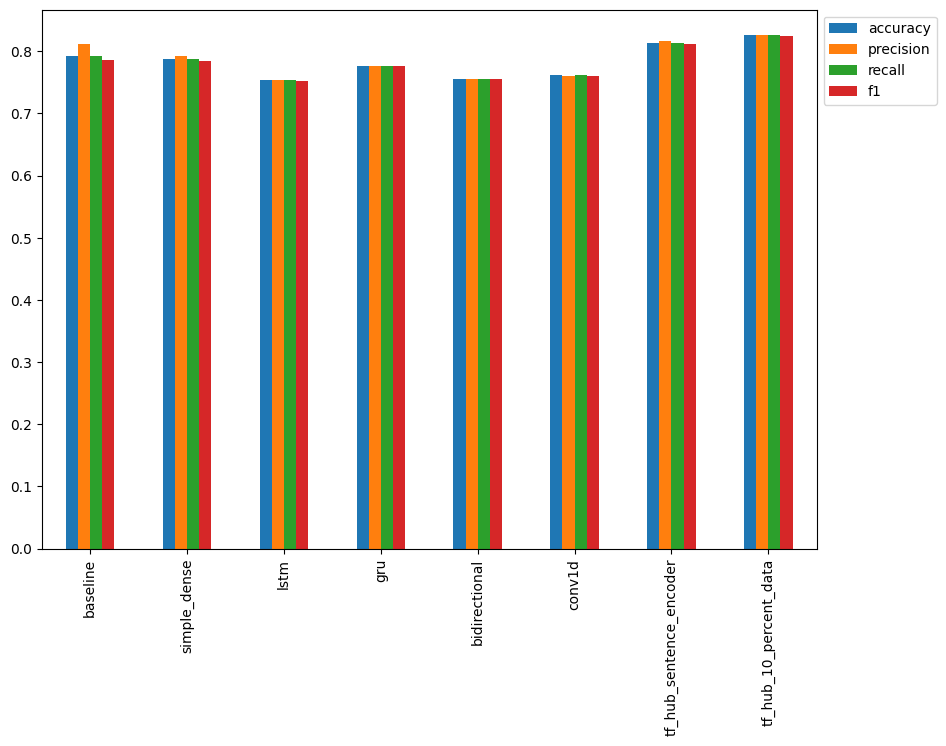

In [ ]:
# Plot and compare all of the model results
all_model_results.plot(kind="bar", figsize=(10, 7)).legend(bbox_to_anchor=(1.0, 1.0));

Görünüşe göre önceden eğitilmiş USE TensorFlow Hub modellerimiz en iyi performansa sahip, eğitim verilerinin yalnızca %10'una sahip model bile diğer modellerden daha iyi performans gösteriyor. Bu, transfer öğreniminin gücünü gösterir.

Detaya inip her modelin F1 puanlarını almaya ne dersiniz?

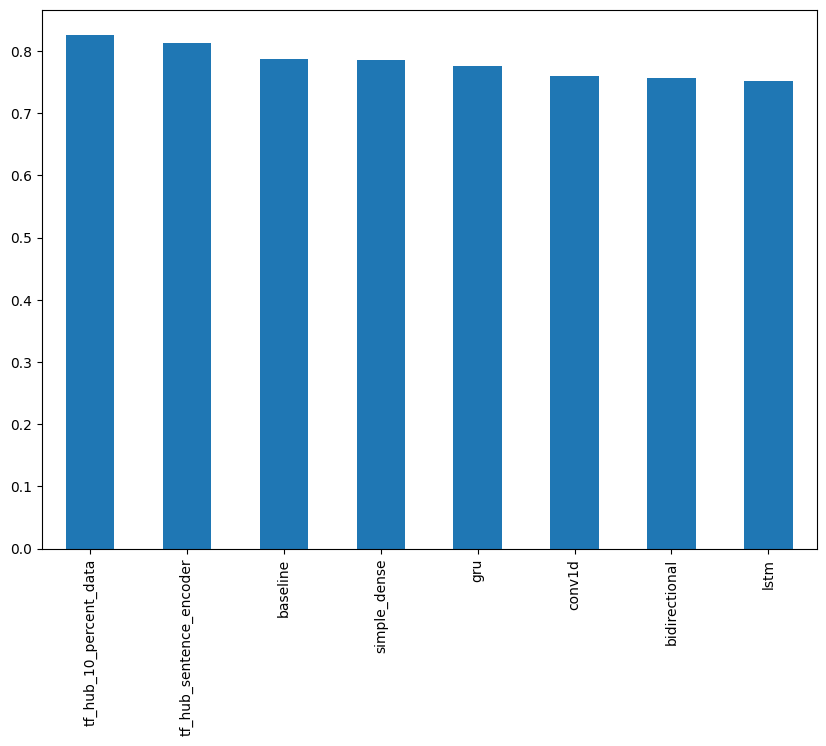

In [ ]:
all_model_results.sort_values("f1",ascending=False)["f1"].plot(kind="bar",figsize=(10,7));

## Uploding our model training logs to TesnorBoard.dev

In [ ]:
# Transfer öğrenme modelleme deneylerinin tensorboard günlüklerini görüntüleyin (4 model olmalıdır)
!tensorboard dev upload --logdir ./model_logs \
  --name "NLP modelling experiments" \
  --description "A series of different NLP modellings experiments with various models" \
  --one_shot # exits the uploader when upload has finished

2023-07-17 09:13:16.579964: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT

***** TensorBoard Uploader *****

This will upload your TensorBoard logs to https://tensorboard.dev/ from
the following directory:

./model_logs

This TensorBoard will be visible to everyone. Do not upload sensitive
data.

Your use of this service is subject to Google's Terms of Service
<https://policies.google.com/terms> and Privacy Policy
<https://policies.google.com/privacy>, and TensorBoard.dev's Terms of Service
<https://tensorboard.dev/policy/terms/>.

This notice will not be shown again while you are logged into the uploader.
To log out, run `tensorboard dev auth revoke`.

Continue? (yes/NO) no


In [ ]:
!tensorboard dev list

2023-07-17 09:23:40.831666: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT

***** TensorBoard Uploader *****

This will list all experiments that you've uploaded to
https://tensorboard.dev. TensorBoard.dev experiments are visible
to everyone. Do not upload sensitive data.

Your use of this service is subject to Google's Terms of Service
<https://policies.google.com/terms> and Privacy Policy
<https://policies.google.com/privacy>, and TensorBoard.dev's Terms of Service
<https://tensorboard.dev/policy/terms/>.

This notice will not be shown again while you are logged into the uploader.
To log out, run `tensorboard dev auth revoke`.

Continue? (yes/NO) yes

To sign in with the TensorBoard uploader:

1. On your computer or phone, visit:

   https://www.google.com/device

2. Sign in with your Google account, then enter:

   FNTX-MQKL

Traceback (most recent call last):
  File "/usr/local/bin/tensorboard", line 8, in <module>
    sys.exit(run_m

In [ ]:
# If you need to remove previous experiments, you can do so using the following command
!tensorboard dev delete --experiment_id pylYSKppQ8Wq3qfMzg8vaQ